In [13]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
kp_training_df = pd.read_csv('../../KPA_2021_shared_task/kpm_data/key_points_train.csv')
arg_training_df = pd.read_csv('../../KPA_2021_shared_task/kpm_data/arguments_train.csv')
labels_df = pd.read_csv('../../KPA_2021_shared_task/kpm_data/labels_train.csv')

In [7]:
kp_training_df.head()

,key_point_id,key_point,topic,stance
0,kp_0_0,Assisted suicide gives dignity to the person t...,Assisted suicide should be a criminal offence,-1
1,kp_0_1,Assisted suicide reduces suffering,Assisted suicide should be a criminal offence,-1
2,kp_0_2,People should have the freedom to choose to en...,Assisted suicide should be a criminal offence,-1
3,kp_0_3,The terminally ill would benefit from assisted...,Assisted suicide should be a criminal offence,-1
4,kp_0_4,Assisted suicide allows people to solicit some...,Assisted suicide should be a criminal offence,1


In [8]:
labels_df.head()

,arg_id,key_point_id,label
0,arg_0_0,kp_0_0,0
1,arg_0_121,kp_0_4,0
2,arg_0_121,kp_0_5,0
3,arg_0_121,kp_0_6,1
4,arg_0_121,kp_0_7,0


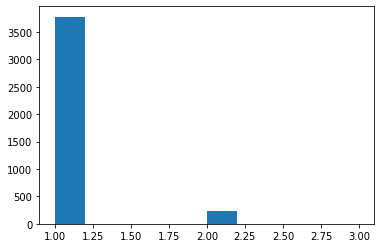

In [21]:
keypoints_per_arg = [x[1] for x in labels_df[labels_df.label == 1].arg_id.value_counts().to_dict().items()]
plt.hist(keypoints_per_arg)
plt.show()

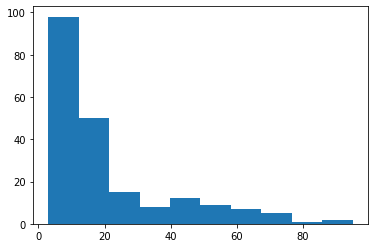

In [20]:
args_per_keypoints = [x[1] for x in labels_df[labels_df.label == 1].key_point_id.value_counts().to_dict().items()]
plt.hist(args_per_keypoints)
plt.show()

-------------

### Preparing data:

In [31]:
import random

In [46]:
def get_cand_neg(argument, pos_keypoint, keypoints):
    return random.sample(keypoints,1)[0]

def gen_triplet(arguments, keypoints, labels_df):
    triplets = []
    for arg_id, argument in arguments.items():
        neg_key_points = [row['keypoint'] for idx, row in labels_df[labels_df.arg_id == arg_id].iterrows() if row['label'] == 0]
        pos_key_points = [row['keypoint'] for idx, row in labels_df[labels_df.arg_id == arg_id].iterrows() if row['label'] == 1]
        if len(neg_key_point) == 0:
            neg_key_points = 
        for pos_key_point in pos_key_points:
            neg_key_point = get_cand_neg(argument, pos_key_point, neg_key_points)
            triplets.append([argument, pos_key_point, neg_key_point ])
    return triplets

In [29]:
arguments = pd.Series(arg_training_df.argument.values, index=arg_training_df.arg_id).to_dict()
key_points= pd.Series(kp_training_df.key_point.values, index=kp_training_df.key_point_id).to_dict()

labels_df['argument'] = labels_df.arg_id.apply(lambda x: arguments[x])
labels_df['keypoint'] = labels_df.key_point_id.apply(lambda x: key_points[x])

In [30]:
labels_df.head()

,arg_id,key_point_id,label,argument,keypoint
0,arg_0_0,kp_0_0,0,`people reach their limit when it comes to the...,Assisted suicide gives dignity to the person t...
1,arg_0_121,kp_0_4,0,a cure or treatment may be discovered shortly ...,Assisted suicide allows people to solicit some...
2,arg_0_121,kp_0_5,0,a cure or treatment may be discovered shortly ...,Assisted suicide is akin to killing someone
3,arg_0_121,kp_0_6,1,a cure or treatment may be discovered shortly ...,Assisted suicide should not be allowed because...
4,arg_0_121,kp_0_7,0,a cure or treatment may be discovered shortly ...,Assisted suicide violates the doctor's role


In [47]:
triplets_data = gen_triplet(arguments, key_points, labels_df)

ValueError: Sample larger than population or is negative

----------

In [22]:
pip install sentence-transformers

     |################################| 78 kB 4.4 MB/s eta 0:00:011
  Created wheel for sentence-transformers: filename=sentence_transformers-1.1.0-py3-none-any.whl size=124138 sha256=31f7f0ffd2fd7ae8c9ddff36bd67a3931f40c836c12d2e6db8bfdf6e0868f1d1
  Stored in directory: /root/.cache/pip/wheels/6e/fc/93/fa5873037e04b951ffd3fa8b768677e3d943db1cb6609c37bb
Successfully built sentence-transformers
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
